![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data

In [3]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [4]:
# Normalizing title names in preparation for join
imdb_adjusted_titles = []
for title in imdb_title_basics['primary_title']:
    imdb_adjusted_titles.append(title.lower().replace(":", "").replace("-", ""))
imdb_title_basics['primary_title'] = imdb_adjusted_titles
imdb_title_basics['primary_title'].head()

0                          sunghursh
1    one day before the rainy season
2         the other side of the wind
3                    sabse bada sukh
4           the wandering soap opera
Name: primary_title, dtype: object

In [5]:
# Create new column with title + year to minimize duplicates when joining
imdb_title_basics['title_year'] = imdb_title_basics['primary_title'] + " " + imdb_title_basics['start_year'].astype('str')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh 2013
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",one day before the rainy season 2019
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,Drama,the other side of the wind 2018
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabse bada sukh 2018
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",the wandering soap opera 2017


In [6]:
# Purging unreleased movies by removing based on year and null runtime
imdb_drop_rows = []
for row in imdb_title_basics.index:
    if (np.isnan(imdb_title_basics['runtime_minutes'][row]) == True) and (imdb_title_basics['start_year'][row] >= 2020):
        imdb_drop_rows.append(row)
imdb_drop_rows[:5]  

[33, 93, 229, 289, 386]

In [7]:
imdb_title_basics.drop(imdb_drop_rows, inplace = True)

In [8]:
len(imdb_title_basics)

145170

In [9]:
imdb_title_basics.duplicated(subset=['title_year']).sum()

2160

In [10]:
imdb_title_basics.duplicated(subset=['primary_title']).sum()

10251

In [11]:
# Dropping duplicate titles
clean_imdb = imdb_title_basics.drop_duplicates(subset=['title_year'], keep="first")
clean_imdb.duplicated(subset=['title_year']).sum()

0

In [12]:
len(clean_imdb)

143010

In [13]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [14]:
# Normalizing title names in preparation for join
bom_adjusted_titles = []
for title in bom_movie_gross['title']:
    bom_adjusted_titles.append(title.lower().replace(":", "").replace("-", ""))
bom_movie_gross['title'] = bom_adjusted_titles
bom_movie_gross['title'].head()

0                                    toy story 3
1                     alice in wonderland (2010)
2    harry potter and the deathly hallows part 1
3                                      inception
4                            shrek forever after
Name: title, dtype: object

In [15]:
# Create new column with title + year to minimize duplicates when joining
bom_movie_gross['title_year'] = bom_movie_gross['title'] + " " + bom_movie_gross['year'].astype('str')
bom_movie_gross = bom_movie_gross.reset_index()
bom_movie_gross.head()

,index,title,studio,domestic_gross,foreign_gross,year,title_year
0,0,toy story 3,BV,415000000.0,652000000,2010,toy story 3 2010
1,1,alice in wonderland (2010),BV,334200000.0,691300000,2010,alice in wonderland (2010) 2010
2,2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000,2010,harry potter and the deathly hallows part 1 2010
3,3,inception,WB,292600000.0,535700000,2010,inception 2010
4,4,shrek forever after,P/DW,238700000.0,513900000,2010,shrek forever after 2010


In [16]:
bom_movie_gross.duplicated(subset=['title']).sum()

1

In [17]:
bom_movie_gross.duplicated(subset=['title_year']).sum()

0

In [18]:
# Joining imdb with bom
len(bom_movie_gross)

3387

In [19]:
len(clean_imdb)

143010

In [20]:
bom_imdb = pd.merge(
    clean_imdb,
    bom_movie_gross,
    how='inner',
    on ='title_year')

In [21]:
bom_imdb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,wazir,Wazir,2016,103.0,"Action,Crime,Drama",wazir 2016,2568,wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",on the road 2012,904,on the road,IFC,744000.0,8000000,2012
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",the secret life of walter mitty 2013,1169,the secret life of walter mitty,Fox,58200000.0,129900000,2013
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",a walk among the tombstones 2014,1577,a walk among the tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",jurassic world 2015,1873,jurassic world,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,tt8362680,mountain,Mountain,2018,15.0,Documentary,mountain 2018,3308,mountain,Greenwich,365000.0,NaN,2018
1919,tt8404272,how long will i love u,Chao shi kong tong ju,2018,101.0,Romance,how long will i love u 2018,3149,how long will i love u,WGUSA,747000.0,82100000,2018
1920,tt8427036,helicopter eela,Helicopter Eela,2018,135.0,Drama,helicopter eela 2018,3354,helicopter eela,Eros,72000.0,NaN,2018
1921,tt9078374,last letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",last letter 2018,3319,last letter,CL,181000.0,NaN,2018


In [22]:
bom_imdb.duplicated(subset=['index']).sum()

0

In [23]:
bom_imdb.duplicated(subset=['tconst']).sum()

0

In [24]:
bom_imdb.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      3
genres               0
title_year           0
index                0
title                0
studio               2
domestic_gross      11
foreign_gross      609
year                 0
dtype: int64

In [25]:
# Dropping rows with no domestic gross data because there are only 11
bom_imdb = bom_imdb.dropna(subset = ['domestic_gross'])

In [26]:
bom_imdb.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
title_year          object
index                int64
title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [27]:
bom_imdb['foreign_gross'][0] == True

False

In [28]:
titles_null_foreign = {}
for row in bom_imdb.index:
    if pd.isna(bom_imdb['foreign_gross'][row]) == True:
        titles_null_foreign[bom_imdb['title_year'][row]] = bom_imdb['domestic_gross'][row]
titles_null_foreign
    

{'wazir 2016': 1100000.0,
 'american pastoral 2016': 544000.0,
 'the stanford prison experiment 2015': 661000.0,
 'being flynn 2012': 540000.0,
 'margaret 2011': 46500.0,
 'suburbicon 2017': 5800000.0,
 'the hero of color city 2014': 32200.0,
 'take me home tonight 2011': 6900000.0,
 'flipped 2010': 1800000.0,
 'the babymakers 2012': 7900.0,
 'red state 2011': 1100000.0,
 'snitch 2013': 42900000.0,
 'the young messiah 2016': 6500000.0,
 'krrish 3 2013': 2200000.0,
 'winchester 2018': 25100000.0,
 'foxcatcher 2014': 12100000.0,
 '222 2017': 400.0,
 'cheerful weather for the wedding 2012': 2700.0,
 'marley 2012': 1400000.0,
 'jai ho 2014': 1300000.0,
 'charlie countryman 2013': 11700.0,
 "you're not you 2014": 11500.0,
 'tyrannosaur 2011': 22300.0,
 'kill the messenger 2014': 2500000.0,
 'a late quartet 2012': 1600000.0,
 'a good old fashioned orgy 2011': 200000.0,
 'the future 2011': 569000.0,
 'broken city 2013': 19700000.0,
 'bellflower 2011': 168000.0,
 "the devil's double 2011": 140

In [29]:
bom_imdb['domestic_gross'].mean()

42926502.922594145

In [30]:
# sort in descending order
{k: v for k, v in sorted(titles_null_foreign.items(), key=lambda item: item[1], reverse=True)}

{'book club 2018': 68600000.0,
 'war room 2015': 67800000.0,
 'all eyez on me 2017': 44900000.0,
 '47 meters down 2017': 44300000.0,
 'snitch 2013': 42900000.0,
 'courageous 2011': 34500000.0,
 'wind river 2017': 33800000.0,
 'when the game stands tall 2014': 30100000.0,
 'hostiles 2017': 29800000.0,
 'home again 2017': 27000000.0,
 'winchester 2018': 25100000.0,
 'our idiot brother 2011': 24800000.0,
 'whiskey tango foxtrot 2016': 23100000.0,
 'keanu 2016': 20600000.0,
 'broken city 2013': 19700000.0,
 'the choice 2016': 18700000.0,
 'admission 2013': 18000000.0,
 'they shall not grow old 2018': 18000000.0,
 'bad santa 2 2016': 17800000.0,
 'free solo 2018': 17500000.0,
 'addicted 2014': 17400000.0,
 'norm of the north 2016': 17100000.0,
 'detroit 2017': 16800000.0,
 'hunter killer 2018': 15800000.0,
 'the infiltrator 2016': 15400000.0,
 'the last exorcism part ii 2013': 15200000.0,
 'woodlawn 2015': 14400000.0,
 'wish upon 2017': 14300000.0,
 'jackie 2016': 14000000.0,
 'love & frien

In [31]:
# Mean domestic gross for movies having missing foreign gross data is indeed
# much lower than all movies mean domestic gross

In [32]:
# Assigning foreign gross null values to $0. It's possible this is missing data 
# because applicable movies are not big budget films, so assigning $0 instead of 
# the median is more ideal.
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].fillna('0')

<ipython-input-32-844da35da3dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].fillna('0')


In [33]:
foreign_adjusted = []
for gross in bom_imdb['foreign_gross']:
    foreign_adjusted.append(gross.replace(",", ""))
bom_imdb['foreign_gross'] = foreign_adjusted

<ipython-input-33-14b01337e924>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['foreign_gross'] = foreign_adjusted


In [34]:
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].astype('float64')

<ipython-input-34-125bfd2a1a68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].astype('float64')


In [35]:
bom_imdb.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
title_year          object
index                int64
title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
dtype: object

In [36]:
bom_imdb.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    3
genres             0
title_year         0
index              0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [37]:
titles_null_runtime = {}
for row in bom_imdb.index:
    if pd.isna(bom_imdb['runtime_minutes'][row]) == True:
        titles_null_runtime[bom_imdb['title_year'][row]] = bom_imdb['domestic_gross'][row]
titles_null_runtime

{'upside down 2013': 105000.0,
 'extraction 2015': 16800.0,
 'the other side 2016': 8100.0}

110.82818229439498
107.0


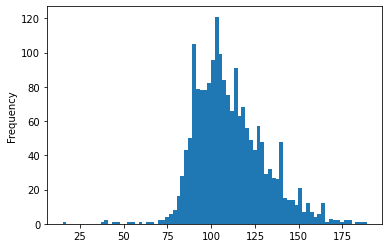

In [38]:
# Replacing null runtime values with median
runtime_mean = bom_imdb['runtime_minutes'].mean()
runtime_median = bom_imdb['runtime_minutes'].median()

bom_imdb['runtime_minutes'].plot(kind='hist', bins=80)
print(bom_imdb['runtime_minutes'].mean())
print(bom_imdb['runtime_minutes'].median())

In [39]:
bom_imdb['runtime_minutes'] = bom_imdb['runtime_minutes'].fillna(runtime_median)

<ipython-input-39-4655749cc4d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['runtime_minutes'] = bom_imdb['runtime_minutes'].fillna(runtime_median)


In [40]:
bom_imdb.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
title_year         0
index              0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [41]:
total_gross = []
for row in bom_imdb.index:
    total_gross.append(bom_imdb['domestic_gross'][row] + bom_imdb['foreign_gross'][row])
bom_imdb['total_gross'] = total_gross
bom_imdb['total_gross']

<ipython-input-41-79b1ebfcbf9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['total_gross'] = total_gross


0         1100000.0
1         8744000.0
2       188100000.0
3        53200000.0
4       652301019.4
           ...     
1918       365000.0
1919     82847000.0
1920        72000.0
1921       181000.0
1922     20300000.0
Name: total_gross, Length: 1912, dtype: float64

In [42]:
bom_imdb.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
title_year         0
index              0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
total_gross        0
dtype: int64

In [43]:
# retrieving unique genres list
unique_genres_list = []
for genre_details in bom_imdb['genres']:
    genres_list = genre_details.split(",")
    for genre in genres_list:
        unique_genres_list.append(genre)

unique_genres_list = sorted(list(set(unique_genres_list)))
unique_genres_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [44]:
# creating and populating genre columns
for genre in unique_genres_list:
    bom_imdb[genre] = bom_imdb['genres'].apply(lambda x: genre in x).astype('int')
bom_imdb.head()

<ipython-input-44-4a0cdf71775f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb[genre] = bom_imdb['genres'].apply(lambda x: genre in x).astype('int')


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0315642,wazir,Wazir,2016,103.0,"Action,Crime,Drama",wazir 2016,2568,wazir,Relbig.,...,0,0,0,0,0,0,0,0,0,0
1,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",on the road 2012,904,on the road,IFC,...,0,0,0,0,1,0,0,0,0,0
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",the secret life of walter mitty 2013,1169,the secret life of walter mitty,Fox,...,0,0,0,0,0,0,0,0,0,0
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",a walk among the tombstones 2014,1577,a walk among the tombstones,Uni.,...,0,0,0,0,0,0,0,0,0,0
4,tt0369610,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",jurassic world 2015,1873,jurassic world,Uni.,...,0,0,0,0,0,1,0,0,0,0


In [45]:
bom_imdb.sort_values(by=['total_gross'], ascending = False).head(50)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1111,tt2395427,avengers age of ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",avengers age of ultron 2015,1875,avengers age of ultron,BV,...,0,0,0,0,0,1,0,0,0,0
761,tt1825683,black panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",black panther 2018,3080,black panther,BV,...,0,0,0,0,0,1,0,0,0,0
212,tt1201607,harry potter and the deathly hallows part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy",harry potter and the deathly hallows part 2 2011,328,harry potter and the deathly hallows part 2,WB,...,0,0,0,0,0,0,0,0,0,0
1157,tt2527336,star wars the last jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",star wars the last jedi 2017,2758,star wars the last jedi,BV,...,0,0,0,0,0,0,0,0,0,0
1634,tt4881806,jurassic world fallen kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",jurassic world fallen kingdom 2018,3081,jurassic world fallen kingdom,Uni.,...,0,0,0,0,0,1,0,0,0,0
1036,tt2294629,frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",frozen 2013,1127,frozen,BV,...,0,0,0,0,0,0,0,0,0,0
1397,tt3606756,incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",incredibles 2 2018,3082,incredibles 2,BV,...,0,0,0,0,0,0,0,0,0,0
299,tt1300854,iron man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",iron man 3 2013,1128,iron man 3,BV,...,0,0,0,0,0,1,0,0,0,0
1034,tt2293640,minions,Minions,2015,91.0,"Adventure,Animation,Comedy",minions 2015,1876,minions,Uni.,...,0,0,0,0,0,0,0,0,0,0
1371,tt3498820,captain america civil war,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",captain america civil war 2016,2322,captain america civil war,BV,...,0,0,0,0,0,1,0,0,0,0


In [46]:
# Q1 What trends exist in gross/genre year upon year?
mean_total_gross = []
for genre in unique_genres_list:
    genre_gross = bom_imdb.loc[bom_imdb[genre] == 1]['total_gross'].mean()
    mean_total_gross.append((genre, genre_gross))
mean_total_gross

[('Action', 190190685.60348624),
 ('Adventure', 320389676.60716176),
 ('Animation', 314138988.5934959),
 ('Biography', 58189028.70769231),
 ('Comedy', 107011699.4011713),
 ('Crime', 62274617.34909091),
 ('Documentary', 10447066.657407407),
 ('Drama', 55344769.441955194),
 ('Family', 154735784.07954547),
 ('Fantasy', 223227357.56060606),
 ('History', 57728077.0),
 ('Horror', 78360422.5165563),
 ('Music', 61411912.16216216),
 ('Musical', 84580666.66666667),
 ('Mystery', 88703551.07194245),
 ('News', 13200.0),
 ('Romance', 43765660.18446602),
 ('Sci-Fi', 339625634.71339285),
 ('Sport', 43154185.71428572),
 ('Thriller', 105161419.42123288),
 ('War', 31476324.0),
 ('Western', 90589508.33333333)]

In [49]:
# finding top 5 genres by mean total gross
def Sort_Tuple(tup): 
    return(sorted(tup, key = lambda x: x[1], reverse=True))

In [54]:
top_5_mean_total_gross = Sort_Tuple(mean_total_gross)[:5]
top_5_mean_total_gross

[('Sci-Fi', 339625634.71339285),
 ('Adventure', 320389676.60716176),
 ('Animation', 314138988.5934959),
 ('Fantasy', 223227357.56060606),
 ('Action', 190190685.60348624)]

In [55]:
# Microsoft will want to enter into the market as a top player. These top five genres
# is what Microsoft should aim for

In [83]:
# preparing action only df for plotting
action_drop_rows = []
for row in bom_imdb.index:
    if bom_imdb['Action'][row] == 0:
        action_drop_rows.append(row)
action_drop_rows[:5]

[1, 2, 5, 6, 7]

In [89]:
action_plot = bom_imdb.drop(action_drop_rows)
print(len(action_plot))

545


<AxesSubplot:xlabel='year'>

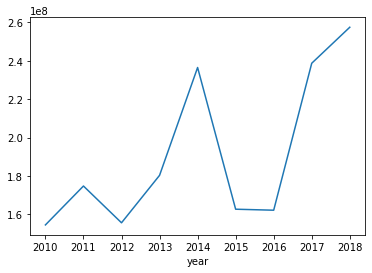

In [88]:
action_plot.groupby(['year'])['total_gross'].mean().plot()

In [90]:
# preparing action only df for plotting
adventure_drop_rows = []
for row in bom_imdb.index:
    if bom_imdb['Adventure'][row] == 0:
        adventure_drop_rows.append(row)
adventure_drop_rows[:5]

[0, 3, 5, 6, 7]

In [91]:
adventure_plot = bom_imdb.drop(adventure_drop_rows)
print(len(adventure_plot))

377


<AxesSubplot:xlabel='year'>

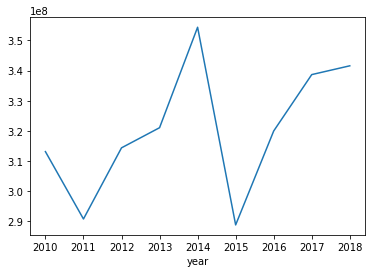

In [92]:
adventure_plot.groupby(['year'])['total_gross'].mean().plot()

In [ ]:
bom_movie_gross[bom_movie_gross['domestic_gross'] > 100000000]

In [36]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [34]:
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [35]:
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [36]:
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [37]:
imdb_title_principles = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_principles

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [38]:
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep="\t", encoding="iso8859-1")
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [39]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep="\t", encoding="iso8859-1")
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [40]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [41]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***